In [3]:
import torch.optim as optim
from model import Net

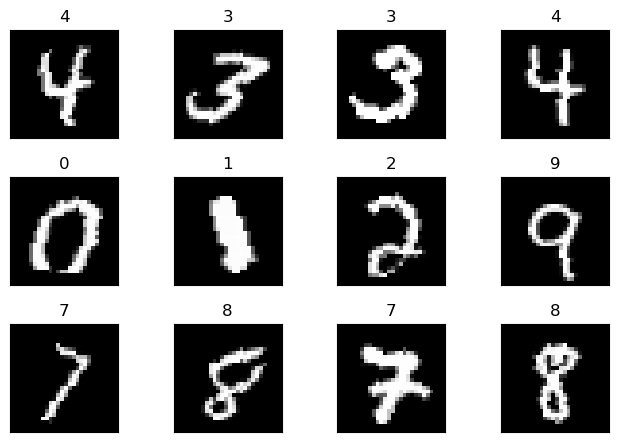

In [11]:
from utils import setup_test_loader, setup_train_loader, plot_data
train_loader = setup_train_loader("../data")
test_loader = setup_test_loader("../data")
plot_data(train_loader)

In [7]:

from utils import get_dst_device, print_model_summary
device = get_dst_device()
model = Net().to(device)
print_model_summary(model)

In [8]:
from utils import train_model, test_model
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 20
train_loss_per_epoch = []
test_loss_per_epoch = []
train_accuracy_per_epoch = []
test_accuracy_per_epoch = []
for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  [train_accuracy, train_loss] = train_model(model, device, train_loader, optimizer, criterion)
  train_accuracy_per_epoch.append(train_accuracy)
  train_loss_per_epoch.append(train_loss)

  [test_accuracy, test_loss] = test_model(model, device, test_loader, criterion)
  test_accuracy_per_epoch.append(train_accuracy)
  test_loss_per_epoch.append(train_loss)

  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.3337 Batch_id=117 Accuracy=58.23: 100%|██████████| 118/118 [01:16<00:00,  1.55it/s]


Test set: Average loss: 0.2041, Accuracy: 9371/10000 (93.71%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.0988 Batch_id=117 Accuracy=94.42: 100%|██████████| 118/118 [01:16<00:00,  1.54it/s]


Test set: Average loss: 0.0942, Accuracy: 9701/10000 (97.01%)

Adjusting learning rate of group 0 to 1.0000e-02.


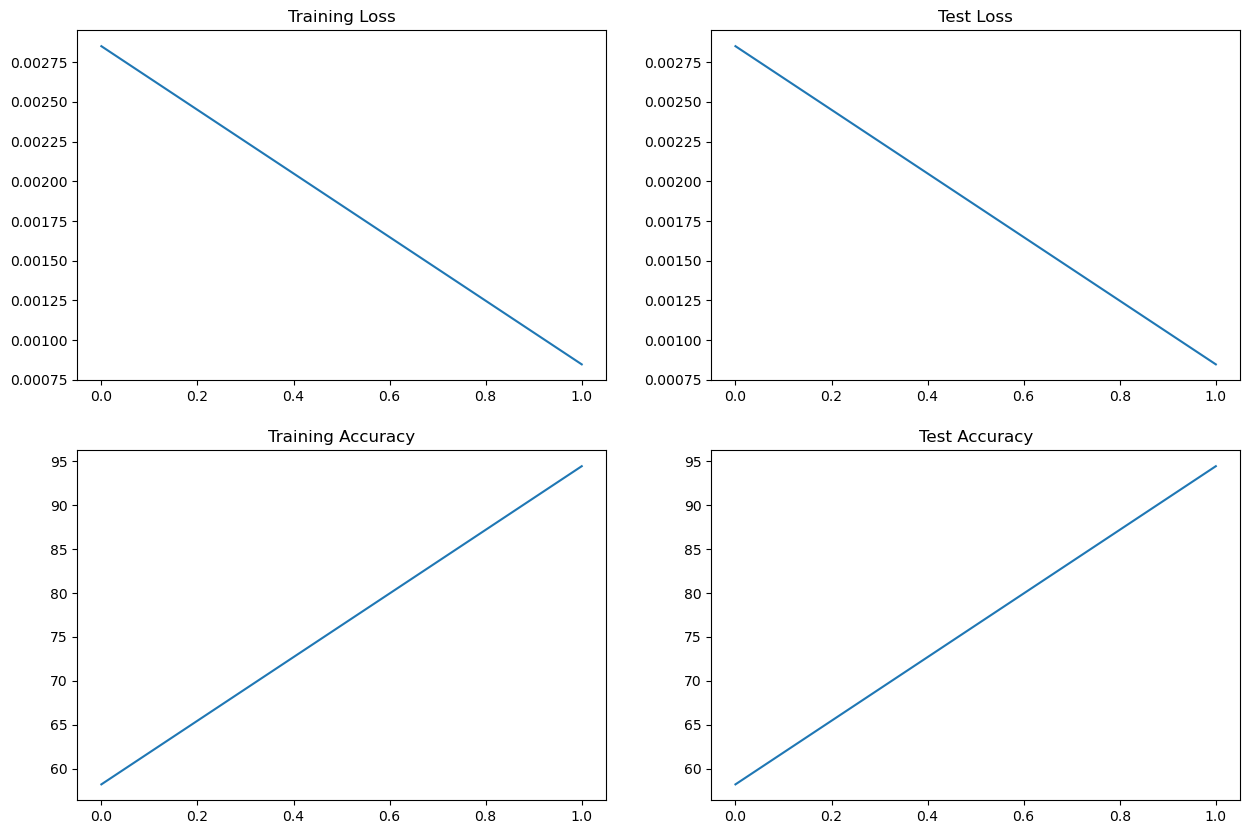

In [10]:
from utils import plot_results
plot_results(train_accuracy_per_epoch, train_loss_per_epoch, test_accuracy_per_epoch, test_loss_per_epoch)